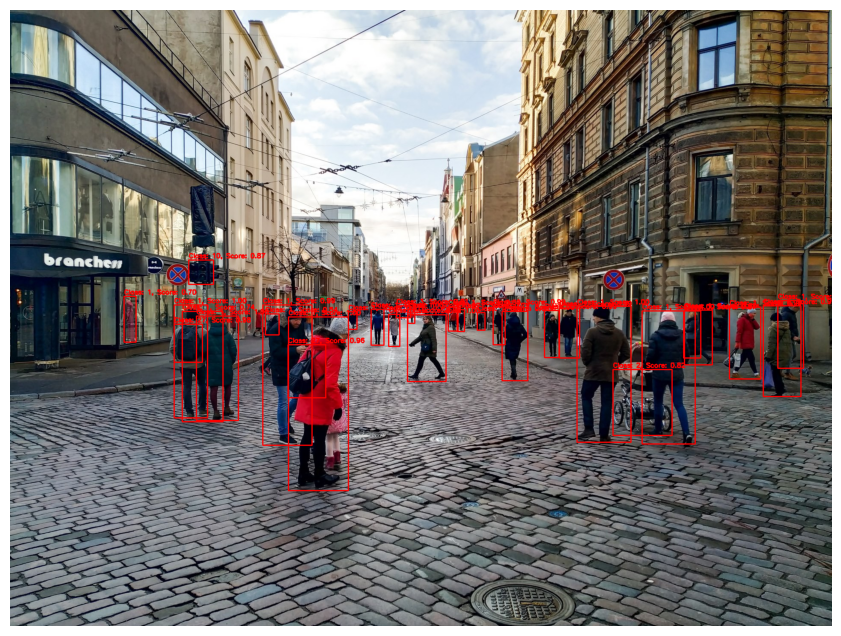

In [4]:



import torch
import torchvision.transforms as transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.io import read_image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Устройство для вычислений
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Загрузка предобученной модели Faster R-CNN
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()
model.to(device)

# Функция для подготовки изображения
def prepare_image(image_path):
    image = read_image(image_path)  # Чтение изображения
    image = image.float() / 255.0  # Нормализация
    return image.unsqueeze(0).to(device)  # Добавление размерности батча

# Функция для визуализации результатов
def visualize_results(image, boxes, labels, scores):
    # Преобразование изображения в формат для отображения
    image = image.permute(1, 2, 0).cpu().numpy()
    image = (image * 255).astype(np.uint8)

    for box, label, score in zip(boxes, labels, scores):
        if score > 0.5:  # Отображаем только объекты с уверенностью > 0.5
            x1, y1, x2, y2 = box.cpu().numpy()
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
            cv2.putText(image, f'Class: {label.item()}, Score: {score.item():.2f}',
                        (int(x1), int(y1) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Основная функция для обнаружения объектов
def detect_objects(image_path):
    image = prepare_image(image_path)

    with torch.no_grad():
        outputs = model(image)

    # Извлечение боксов, меток и оценок
    boxes = outputs[0]['boxes']
    labels = outputs[0]['labels']
    scores = outputs[0]['scores']

    # Визуализация результатов
    visualize_results(image.squeeze(0), boxes, labels, scores)

# Пример использования
image_path = '/content/a100f829-afeb-4db8-b153-5c9147ac287e.jpeg'  # Укажите путь к вашему изображению
detect_objects(image_path)
